# AI for Healthcare, Homework 1 - CT Reconstruction

#### In this assignment we will explore the basic principles of image reconstruction in computed tomography (CT), in particular filtered back projection and iterative reconstruction. We will use functions to convert an image into radon space and create a sinogram, a synthetic projection per radon or fanbeam (corresponding to parallel or fanbeam geometry respectively). Then utilizing those synthetic projections, we will reconstruct the original image.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon, iradon_sart
from skimage.data import shepp_logan_phantom


In [2]:
# Create the Shepp-Logan head phantom, which is a common test image for CT
phantom = shepp_logan_phantom()

In [3]:
# create a horizontal line
line_img = np.zeros_like(phantom)
line_img[175:225, :] = 1

In [4]:
# create a circle
circle_img = np.zeros_like(phantom)
full_circle_radius = 25
empty_circle_radius = 50

# loop over all pixels in the image,
# if pixel inside the full circle OR on the edge of the empty circle, then set the pixel value to 1
for i in range(phantom.shape[0]):
    for j in range(phantom.shape[1]):
        # calculate the distance between the current pixel and the center of the image
        distance_from_center = np.sqrt((i - phantom.shape[0] / 2) ** 2 + (j - phantom.shape[1] / 2) ** 2)
        # if the distance is smaller than full_circle_radius, then the pixel is inside the full circle
        if distance_from_center < full_circle_radius:
            circle_img[i, j] = 1
        # if the distance is almost equal to empty_circle_radius, then the pixel is on the edge of the empty circle
        elif np.abs(distance_from_center - empty_circle_radius) <= 1:
            circle_img[i, j] = 1



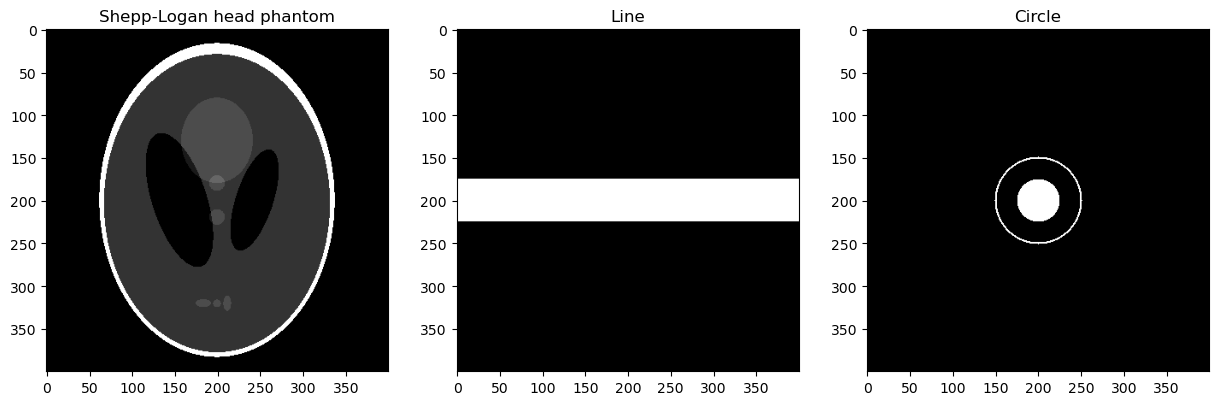

In [5]:
# plot the Shepp-Logan head phantom, line and circle
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(phantom, cmap='gray')
axes[0].set_title('Shepp-Logan head phantom')
axes[1].imshow(line_img, cmap='gray')
axes[1].set_title('Line')
axes[2].imshow(circle_img, cmap='gray')
axes[2].set_title('Circle')
plt.show()


# Step 1: Calculate synthetic projection using Radon Transform.

#### Radon transform:
The Radon transform is a mathematical operation that converts a function of two variables (f(x, y)) into a function of one variable and an angle parameter (f(ρ, θ)). The Radon transform is named after the German mathematician Christian Johann Radon. The Radon transform is used in tomography, which is a technique for reconstructing a two-dimensional image from a set of projections. The Radon transform is also used in the field of image processing, where it is used to detect edges in an image.

#### sinogram:
A sinogram is a two-dimensional projection of a three-dimensional object. It is a set of projections taken along a particular direction. The sinogram is a two-dimensional array of intensity values, where the first dimension is the projection angle and the second dimension is the projection position. The sinogram is used to reconstruct the original image.

In [6]:
# Set the projection angles
angles = np.linspace(0., 180., 180, endpoint=False)

# Calculate the sinogram using Radon Transform
phantom_sinogram = radon(phantom, theta=angles, circle=True)
line_sinogram = radon(line_img, theta=angles, circle=True)
circle_sinogram = radon(circle_img, theta=angles, circle=True)


C:\Users\baruc\anaconda3\envs\HealthCare\lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


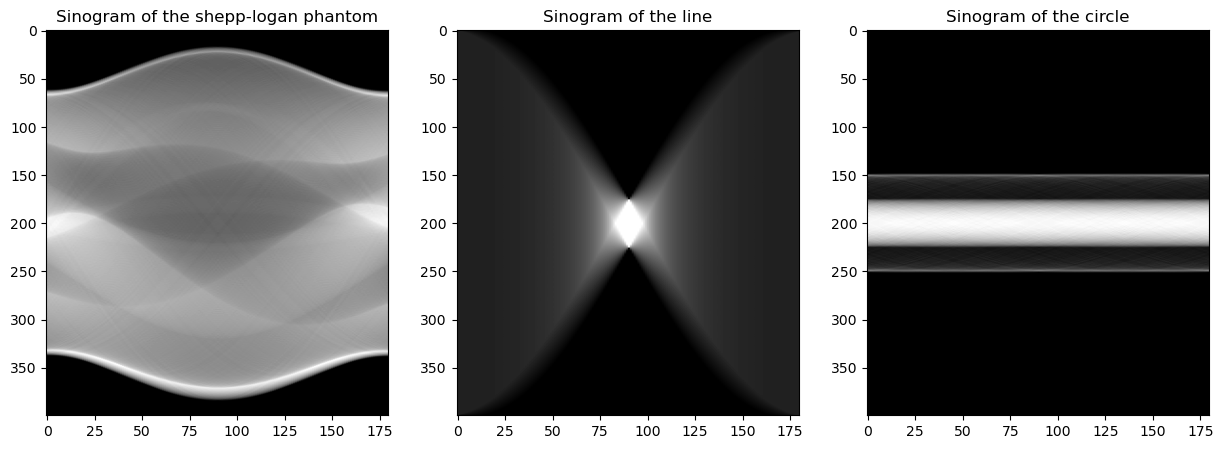

In [7]:
# Plot the sinogram of the shepp-logan phantom, line and circle
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(phantom_sinogram, cmap='gray', aspect='auto')
axes[0].set_title('Sinogram of the shepp-logan phantom')
axes[1].imshow(line_sinogram, cmap='gray', aspect='auto')
axes[1].set_title('Sinogram of the line')
axes[2].imshow(circle_sinogram, cmap='gray', aspect='auto')
axes[2].set_title('Sinogram of the circle')
plt.show()

# Step 2: Vary the number of projection angles and perform reconstruction

#### Reconstruction:
Reconstruction is the process of recovering the original image from the sinogram. The reconstruction process is performed using the Inverse Radon Transform. The Inverse Radon Transform is the inverse of the Radon Transform.

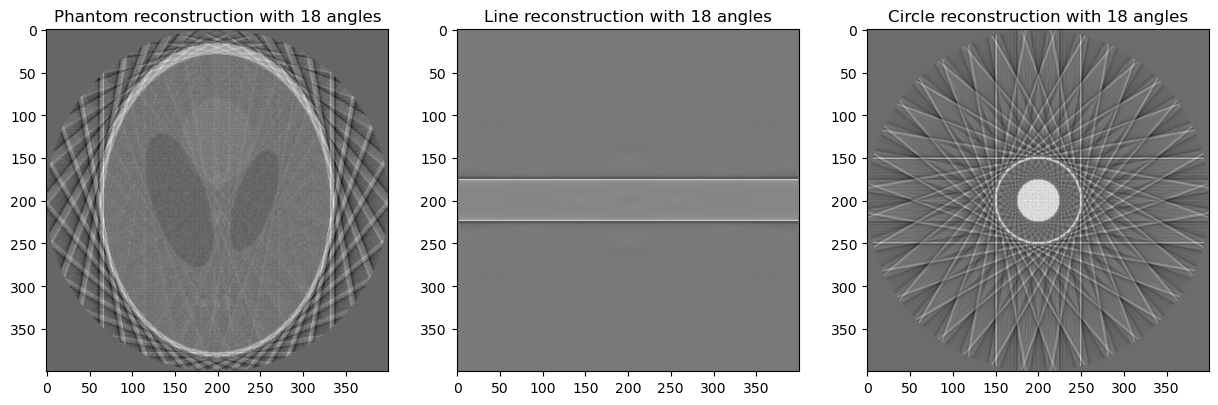

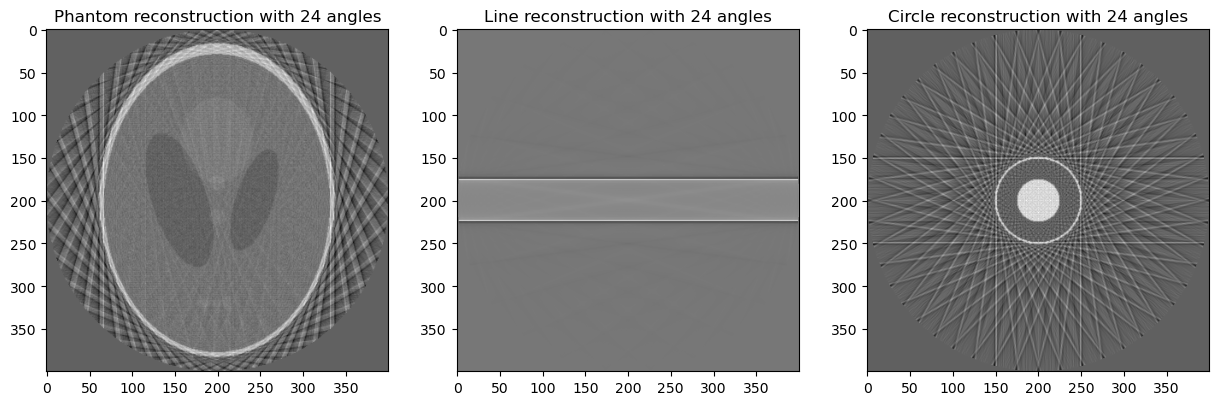

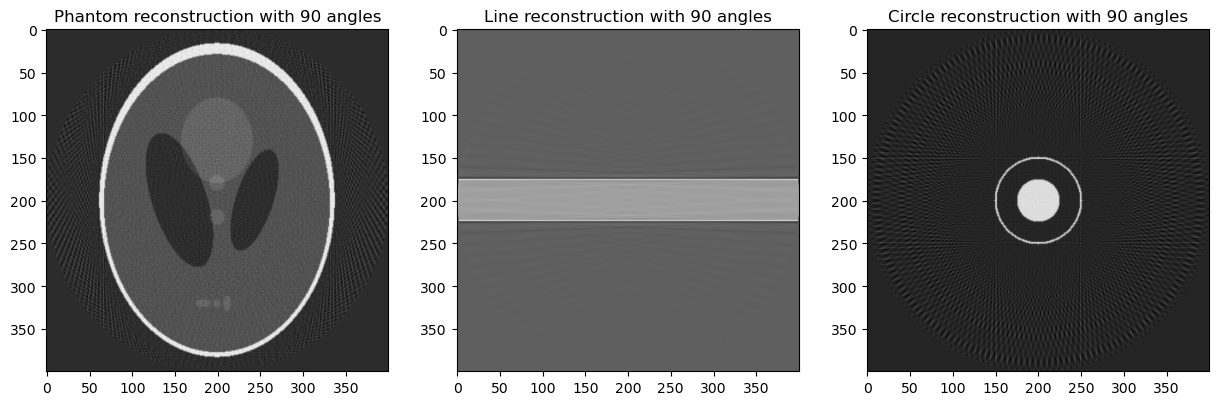

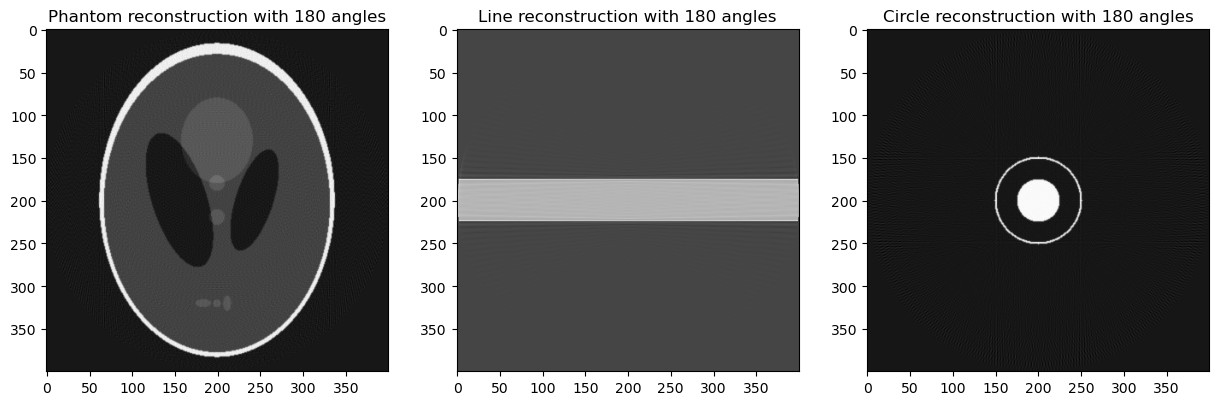

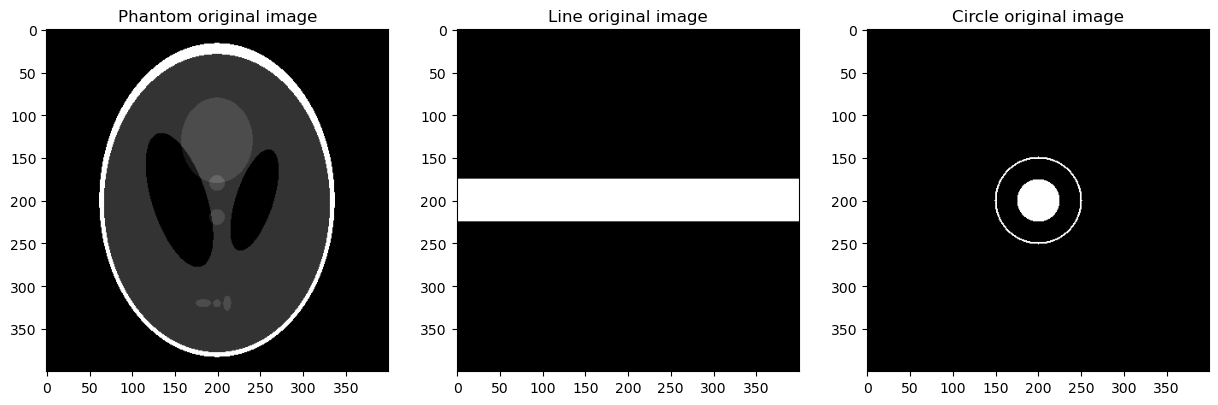

In [8]:
angle_list = [18, 24, 90, 180]

for num_angles in angle_list:
    angles = np.linspace(0., 180., num_angles, endpoint=False)

    # Calculate the synthetic projection using Radon Transform (shepp-logan phantom)
    phantom_sinogram = radon(phantom, theta=angles, circle=True)
    reconstruction = iradon(phantom_sinogram, theta=angles, circle=True)

    # Calculate the synthetic projection using Radon Transform (line phantom)
    line_sinogram = radon(line_img, theta=angles, circle=True)
    line_reconstruction = iradon(line_sinogram, theta=angles, circle=True)

    # Calculate the synthetic projection using Radon Transform (circle phantom)
    circle_sinogram = radon(circle_img, theta=angles, circle=True)
    circle_reconstruction = iradon(circle_sinogram, theta=angles, circle=True)

    # plot the 3 reconstructions in one row
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(reconstruction, cmap='gray')
    axes[0].set_title('Phantom reconstruction with {} angles'.format(num_angles))
    axes[1].imshow(line_reconstruction, cmap='gray')
    axes[1].set_title('Line reconstruction with {} angles'.format(num_angles))
    axes[2].imshow(circle_reconstruction, cmap='gray')
    axes[2].set_title('Circle reconstruction with {} angles'.format(num_angles))
    plt.show()

# plot the 3 original images in one row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(phantom, cmap='gray')
axes[0].set_title('Phantom original image')
axes[1].imshow(line_img, cmap='gray')
axes[1].set_title('Line original image')
axes[2].imshow(circle_img, cmap='gray')
axes[2].set_title('Circle original image')
plt.show()


# Step 3: Demonstrate the difference between back projection and filtered back projection

#### Back projection:
Back projection is a method of reconstructing an image from a set of projections.

#### Filtered back projection:
Filtered back projection methods are used to reduce the noise in the reconstructed image.

#### Unfiltered back projection:
Unfiltered back projection methods are used to reconstruct the original image without any noise reduction.

In [9]:
# Filtered back projection
filtered_reconstruction = iradon(phantom_sinogram, theta=angles, circle=True, filter_name='ramp')
filtered_line_reconstruction = iradon(line_sinogram, theta=angles, circle=True, filter_name='ramp')
filtered_circle_reconstruction = iradon(circle_sinogram, theta=angles, circle=True, filter_name='ramp')

# Unfiltered back projection
unfiltered_reconstruction = iradon(phantom_sinogram, theta=angles, circle=True, filter_name=None)
unfiltered_line_reconstruction = iradon(line_sinogram, theta=angles, circle=True, filter_name=None)
unfiltered_circle_reconstruction = iradon(circle_sinogram, theta=angles, circle=True, filter_name=None)

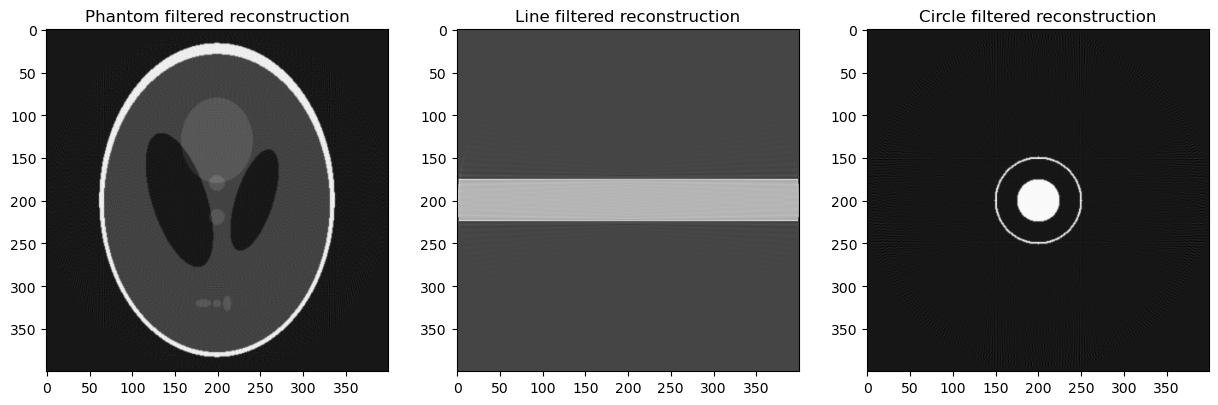

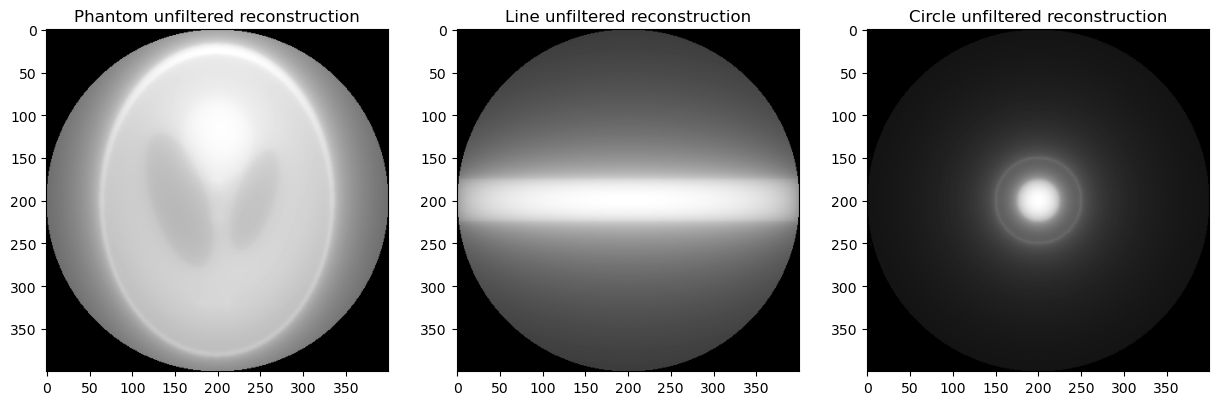

In [10]:
# plot the 3 filtered reconstructions in one row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(filtered_reconstruction, cmap='gray')
axes[0].set_title('Phantom filtered reconstruction')
axes[1].imshow(filtered_line_reconstruction, cmap='gray')
axes[1].set_title('Line filtered reconstruction')
axes[2].imshow(filtered_circle_reconstruction, cmap='gray')
axes[2].set_title('Circle filtered reconstruction')
plt.show()

# plot the 3 unfiltered reconstructions in one row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(unfiltered_reconstruction, cmap='gray')
axes[0].set_title('Phantom unfiltered reconstruction')
axes[1].imshow(unfiltered_line_reconstruction, cmap='gray')
axes[1].set_title('Line unfiltered reconstruction')
axes[2].imshow(unfiltered_circle_reconstruction, cmap='gray')
axes[2].set_title('Circle unfiltered reconstruction')
plt.show()

# Step 4: Apply & describe an algebraic iterative reconstruction technique such as SART

#### SART:

SART, or Simultaneous Algebraic Reconstruction Technique, is an algebraic iterative reconstruction method used primarily in computed tomography (CT) to reconstruct an image from a set of projection data. This technique is designed to produce high-quality images while minimizing noise and artifacts, making it particularly useful in medical imaging and non-destructive testing.

SART is based on the principle of iterative refinement, in which an initial estimate of the image is improved step-by-step to better approximate the true image. The algorithm solves the linear system Ax = b, where A is the projection matrix, x is the reconstructed image, and b is the measured projection data.

#### Here's an outline of the SART algorithm:

1. Initialization: Start with an initial estimate of the image, usually a uniform or random distribution. This estimate is represented by a vector x_0.

2. Iteration: For each iteration k, perform the following steps:
a. Select a projection: Choose one of the available projection angles, and the corresponding row of the projection matrix A.
b. Update estimate: Calculate the difference between the measured projection data and the current estimate of the image along the chosen angle. This difference is called the residual (r = b - Ax_k).
c. Correction: Update the image estimate by adding a fraction of the residual back to the estimate. This fraction is determined by a relaxation parameter (ω), which controls the convergence speed of the algorithm. The updated image estimate x_{k+1} = x_k + ω * A^T * r.
d. Loop: Continue iterating through all available projection angles, updating the image estimate after each angle.

3. Convergence: Repeat the iterations until the algorithm converges, i.e., when the difference between successive image estimates becomes small enough or a predetermined number of iterations is reached.

4. Post-processing: Apply any necessary filtering or smoothing to the final image estimate to remove noise or artifacts.


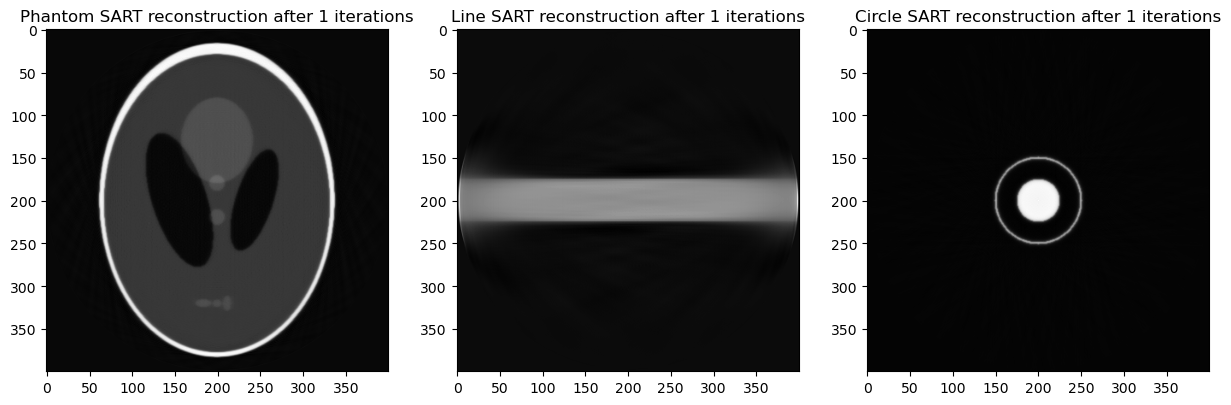

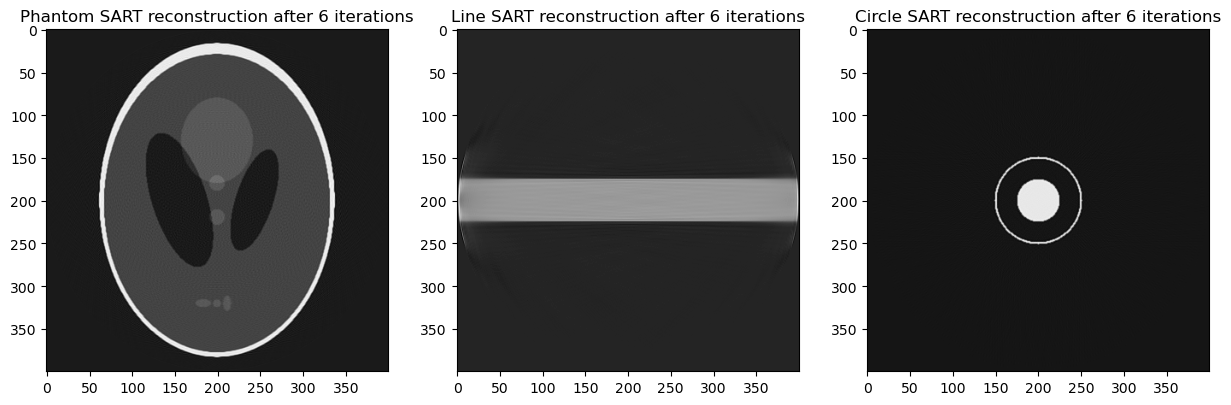

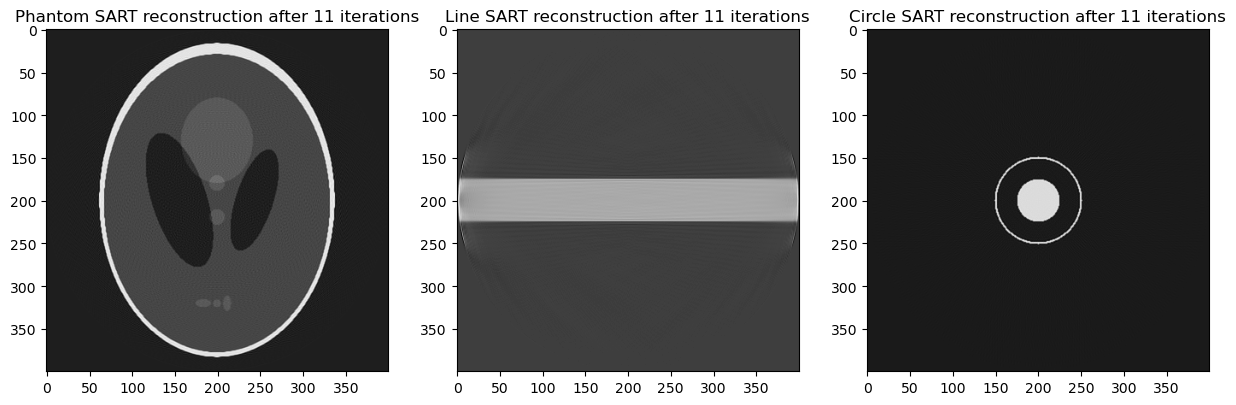

In [11]:
n_iter = 10
# Initialize the reconstruction
sart_reconstruction = np.zeros_like(phantom)
sart_line_reconstruction = np.zeros_like(line_img)
sart_circle_reconstruction = np.zeros_like(circle_img)

# Perform the SART reconstruction for n_iter iterations
for i in range(n_iter + 1):
    sart_reconstruction = iradon_sart(phantom_sinogram, theta=angles, image=sart_reconstruction, relaxation=0.15)
    sart_line_reconstruction = iradon_sart(line_sinogram, theta=angles, image=sart_line_reconstruction, relaxation=0.15)
    sart_circle_reconstruction = iradon_sart(circle_sinogram, theta=angles, image=sart_circle_reconstruction, relaxation=0.15)

    # plot the reconstruction every 5 iterations
    if i % 5 == 0:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes[0].imshow(sart_reconstruction, cmap='gray')
        axes[0].set_title('Phantom SART reconstruction after {} iterations'.format(i + 1))
        axes[1].imshow(sart_line_reconstruction, cmap='gray')
        axes[1].set_title('Line SART reconstruction after {} iterations'.format(i + 1))
        axes[2].imshow(sart_circle_reconstruction, cmap='gray')
        axes[2].set_title('Circle SART reconstruction after {} iterations'.format(i + 1))
        plt.show()

In [16]:
from skimage.metrics import mean_squared_error

# calculate the mean squared error between the original image and the SART reconstructions
print('Phantom SART reconstruction MSE: {}'.format(mean_squared_error(phantom, sart_reconstruction)))
print('Line SART reconstruction MSE: {}'.format(mean_squared_error(line_img, sart_line_reconstruction)))
print('Circle SART reconstruction MSE: {}'.format(mean_squared_error(circle_img, sart_circle_reconstruction)))

# calculate the mean squared error between the original image and the filtered reconstructions
print('Phantom Filtered reconstruction MSE: {}'.format(mean_squared_error(phantom, filtered_reconstruction)))
print('Line Filtered reconstruction MSE: {}'.format(mean_squared_error(line_img, filtered_line_reconstruction)))
print('Circle Filtered reconstruction MSE: {}'.format(mean_squared_error(circle_img, filtered_circle_reconstruction)))


Phantom SART reconstruction MSE: 0.0009000615442701557
Line SART reconstruction MSE: 0.0017830768892038858
Circle SART reconstruction MSE: 0.00027852146704217083
Phantom Filtered reconstruction MSE: 0.001174157308614088
Line Filtered reconstruction MSE: 0.002868694491203408
Circle Filtered reconstruction MSE: 0.0006899918784872878


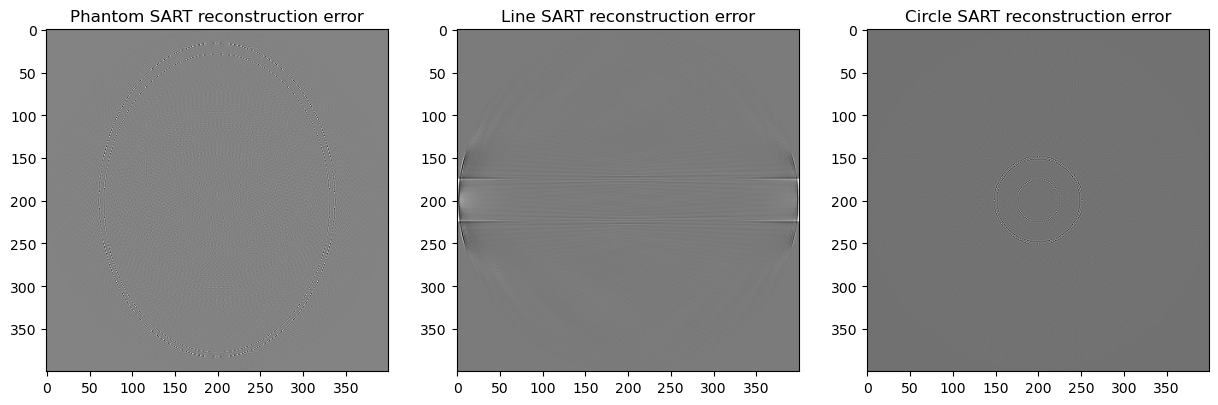

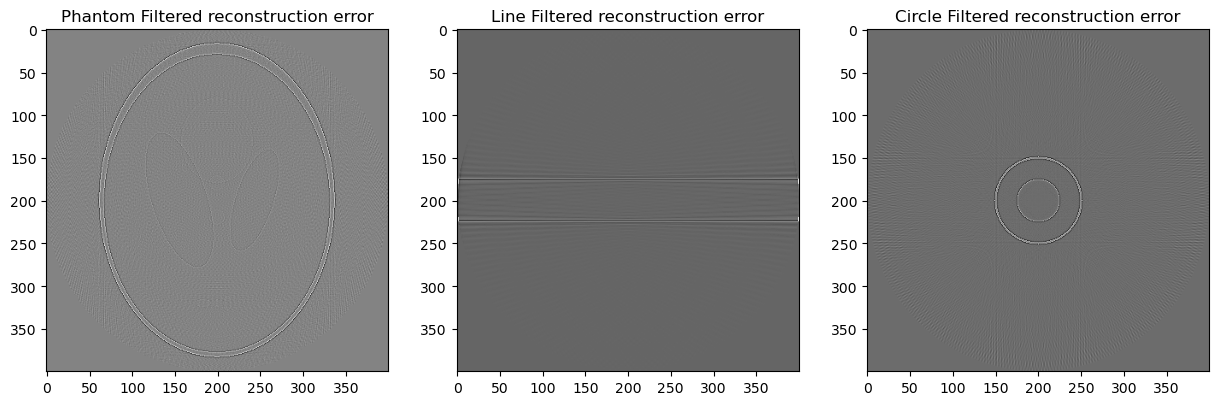

In [17]:
# plot the difference between the original image and the reconstructions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(phantom - sart_reconstruction, cmap='gray')
axes[0].set_title('Phantom SART reconstruction error')
axes[1].imshow(line_img - sart_line_reconstruction, cmap='gray')
axes[1].set_title('Line SART reconstruction error')
axes[2].imshow(circle_img - sart_circle_reconstruction, cmap='gray')
axes[2].set_title('Circle SART reconstruction error')
plt.show()

# plot the difference between the original image and the reconstructions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(phantom - filtered_reconstruction, cmap='gray')
axes[0].set_title('Phantom Filtered reconstruction error')
axes[1].imshow(line_img - filtered_line_reconstruction, cmap='gray')
axes[1].set_title('Line Filtered reconstruction error')
axes[2].imshow(circle_img - filtered_circle_reconstruction, cmap='gray')
axes[2].set_title('Circle Filtered reconstruction error')
plt.show()